#***Linear Regression to analyze the relationship between Cancer Data(mortality, incidence) and Socio-Economic Factors***

In [3]:
#importing the basic required libraries
import numpy as np
import pandas as pd

##Reading data from the given data format(excel file)

In [4]:
from google.colab import files 
uploaded= files.upload() #uploading the files

Saving cancer_data_notes.xlsx to cancer_data_notes.xlsx
Saving death .xlsx to death .xlsx
Saving incd.xlsx to incd.xlsx
Saving merged_data.xlsx to merged_data.xlsx


In [5]:
import io
#creating dataframes from the excel files
df_death=pd.read_excel(io.BytesIO(uploaded['death .xlsx'])) 
df_incd=pd.read_excel(io.BytesIO(uploaded['incd.xlsx']))
df_socioeco=pd.read_excel(io.BytesIO(uploaded['merged_data.xlsx']))

In [6]:
df_death.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,157376,falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [7]:
df_incd.head()

,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


In [8]:
df_socioeco.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,NaN,25625.0,419,124,349,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [9]:
df_incd.columns

Index(['County', ' FIPS', 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

In [10]:
df_death .columns

Index(['County', 'FIPS', 'Met Objective of 45.5? (1)',
       'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend'],
      dtype='object')

In [11]:
df_socioeco.columns

Index(['Unnamed: 0', 'State', 'AreaName', 'All_Poverty', 'M_Poverty',
       'F_Poverty', 'FIPS', 'Med_Income', 'Med_Income_White',
       'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic',
       'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'fips_x', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'fips_y', 'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

##Cleaning and Preparing the Data for Analysis

###Merging the dataframes:

In [12]:
df_incd = df_incd.rename(columns={' FIPS': 'FIPS'})

In [13]:
merged_df = df_death.merge(df_incd, on="FIPS") #merging df_incd and df_death dataframes into merged_df

In [14]:
merged_df.head()

,County_x,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,County_y,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,United States,0,No,46,45.9,46.1,157376,falling,-2.4,-2.6,-2.2,"US (SEER+NPCR)(1,10)",62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,"Perry County, Kentucky(7,9)",139.7,122.2,159.1,49,falling,-15,-26.3,-1.9
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4,"Powell County, Kentucky(7,9)",152.9,125.7,184.6,23,stable,8.2,-7.3,26.2
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**,"North Slope Borough, Alaska(6,10)",153.4,95.2,229.4,6,stable,0.2,-34.3,52.7
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8,"Owsley County, Kentucky(7,9)",148.1,107.8,199.8,9,stable,10.6,-13.1,40.9


In [15]:
merged_df.columns

Index(['County_x', 'FIPS', 'Met Objective of 45.5? (1)',
       'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend', 'County_y',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

In [16]:
merged_df = merged_df.rename(columns={'County_x': 'AreaName'})

In [17]:
df =  merged_df.merge(df_socioeco, on="AreaName") #merging merged_df and df_socioeco into the final dataframe(df)

In [18]:
df.head()

,AreaName,FIPS_x,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,County_y,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Unnamed: 0,State,All_Poverty,M_Poverty,F_Poverty,FIPS_y,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,"Perry County, Kentucky(7,9)",139.7,122.2,159.1,49,falling,-15,-26.3,-1.9,1083,KY,6894,2903,3991,21193,32667.0,31911.0,93000.0,NaN,NaN,NaN,11544,1921,11982,1944,23526,3865,21193,139.7,49,falling,21193,125.6,43
1,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4,"Powell County, Kentucky(7,9)",152.9,125.7,184.6,23,stable,8.2,-7.3,26.2,1085,KY,3392,1361,2031,21197,29736.0,30476.0,NaN,NaN,NaN,16688.0,5131,829,5551,714,10682,1543,21197,152.9,23,stable,21197,125.3,18
2,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**,"North Slope Borough, Alaska(6,10)",153.4,95.2,229.4,6,stable,0.2,-34.3,52.7,16,AK,976,532,444,2185,72576.0,86250.0,107500.0,59554.0,126964.0,88563.0,4847,1248,2579,910,7426,2158,2185,153.4,6,stable,2185,124.9,5
3,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8,"Owsley County, Kentucky(7,9)",148.1,107.8,199.8,9,stable,10.6,-13.1,40.9,1081,KY,1710,810,900,21189,20985.0,20618.0,NaN,NaN,NaN,NaN,1879,247,2108,300,3987,547,21189,148.1,9,stable,21189,118.5,8
4,"Union County, Florida",12125,No,113.5,89.9,141.4,19,falling,-2.2,-4.3,0,"Union County, Florida(6,10)",203.7,172.4,239.1,35,stable,1.4,-10.3,14.6,376,FL,2002,814,1188,12125,39163.0,40244.0,28516.0,86071.0,NaN,NaN,4013,645,4612,749,8625,1394,12125,203.7,35,stable,12125,113.5,19


In [19]:
df.columns

Index(['AreaName', 'FIPS_x', 'Met Objective of 45.5? (1)',
       'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend', 'County_y',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'Unnamed: 0', 'State', 'All_Poverty', 'M_Poverty', 'F_Poverty',
       'FIPS_y', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'Al

###Filtering the data required from dataframe:
While the dataframe contains a wealth of information, we shall limit our analysis to only the required variables in the data which will be helpful for our analysis.

In [20]:
selected_columns=['AreaName', 'Met Objective of 45.5? (1)', 'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate', 
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'Mortality_Rate', 'Avg_Ann_Deaths'] #list of all columns that will be relevanat to our analysis

In [21]:
df=df[selected_columns]

###Cleaning the data:

In [22]:
df=df.astype('str') #converting all values in df to strings

In [23]:
#removing all the trailing and leading spaces from the data values
for i in selected_columns:
  for j in range(0,len(df[i])):
     df[i][j]=str(df[i][j]).strip() 

In [24]:
#One hot encoding of the 'Met Objective of 45.5? (1)' column:
for j in range(0,len(df['Met Objective of 45.5? (1)'])):
     if df['Met Objective of 45.5? (1)'][j]=='Yes':
       df['Met Objective of 45.5? (1)'][j]=1
     if df['Met Objective of 45.5? (1)'][j]=='No':
       df['Met Objective of 45.5? (1)'][j]=(-1)

In [25]:
df = df.replace(',','', regex=True) #handling the redundant commas present in the numerical values

In [26]:
columns1=[ 'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate', 
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 
       'Incidence_Rate', 'Avg_Ann_Incidence', 
       'Mortality_Rate', 'Avg_Ann_Deaths'] #columns1 is a list of all columns of df with numerical values stored in them

In [27]:
df=df.replace(to_replace="#",value=np.nan, regex=True) #removing incomplete data represented by '#' symbols in the datframe

In [28]:
#handling the noise in the data
for i in df.columns:
  for j in range(0,len(df[i])):
    if df.loc[j,i]=='**':
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='*':
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='_':
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='__' :
      df.loc[j,i]=np.nan
    if df.loc[j,i]==None:
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='nan':
      df.loc[j,i]=np.nan
    if df.loc[j,i]=='3 or fewer':
      df.loc[j,i]=1.5

In [29]:
for i in columns1: 
  df[i]=df[i].astype('float') #converting all values in the columns1 of df to float

###Handling the NaN values in the data:

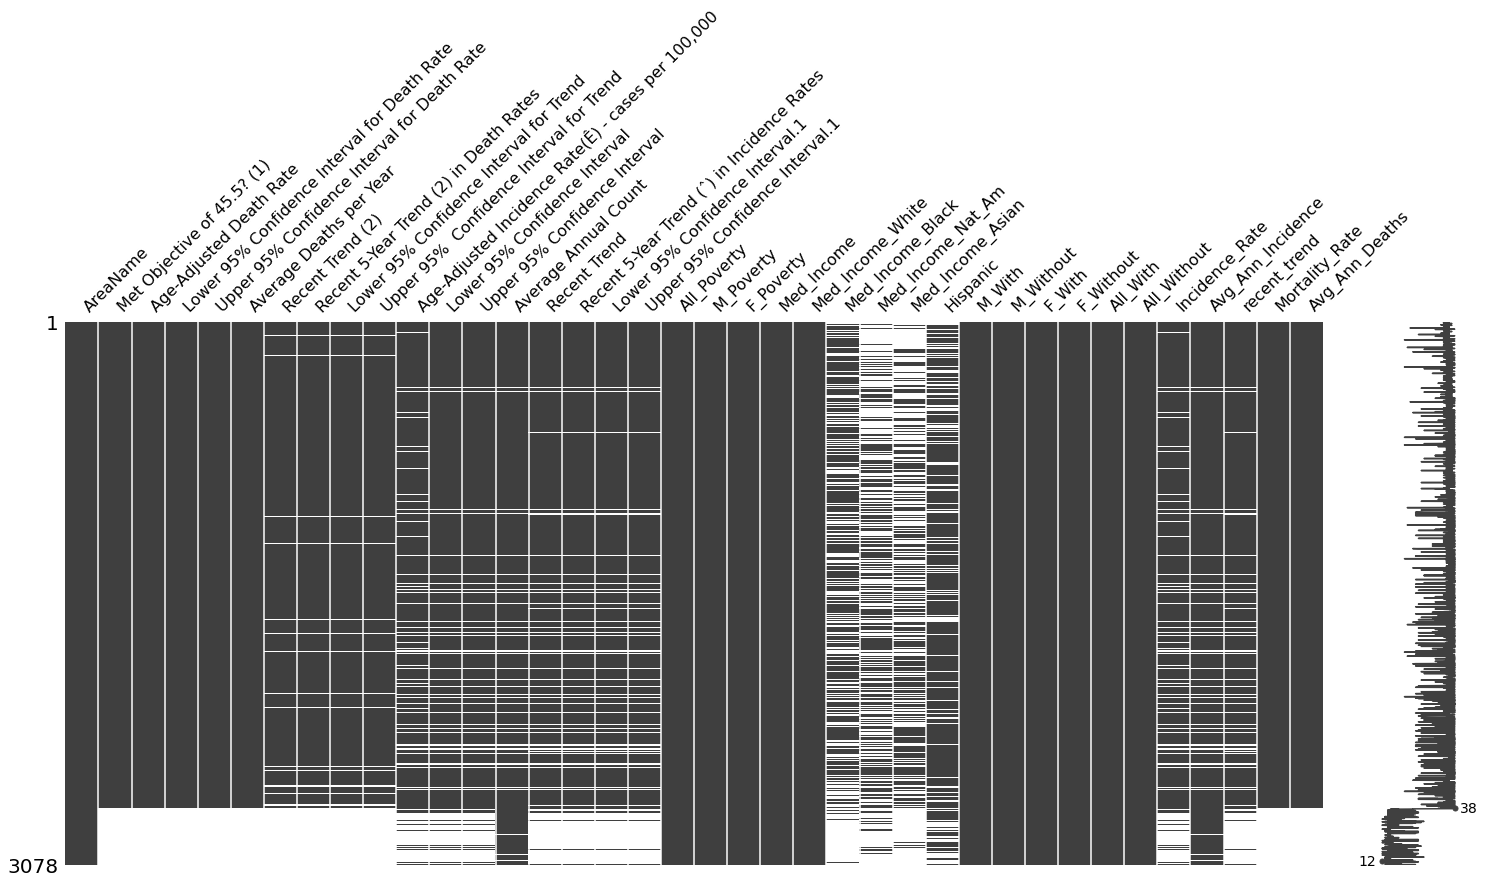

In [30]:
import missingno as msno 
msno.matrix(df) #visualizing the missing data/NaN values in the dataframe

From the above matrix, we infer that:


*   The rows at the end(rows after and including row 2757) contain lot of NaN values in a significant number of columns. Hence the best way in which we can handle them by deleting these rows completely.
*   The columns 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian' have a significant amount NaN values overall.
*   Columns with missing values (even after deleting these end rows starting row 2757): 'recent_trend', 'Recent Trend (2)', 'Recent 5-Year Trend (2) in Death Rates', 'Recent Trend', 'Recent 5-Year Trend (ˆ) in Incidence Rates', 'Lower 95% Confidence Interval for Trend', 'Upper 95%  Confidence Interval for Trend', 'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval', 'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1', 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000', 'Incidence_Rate', 'Avg_Ann_Incidence', 'Average Annual Count', 'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic'.



In [31]:
#The rows at the end contain lot of NaN values in a significant number of columns. We can handle them by deleting these rows (rows after and including 2757).
df = df.iloc[0:2756]

In [32]:
print("variance in 'Med_Income_White':",np.var(df['Med_Income_White'], axis = None))
print("variance in 'Med_Income_Black':",np.var(df['Med_Income_Black'], axis = None))
print("variance in 'Med_Income_Asian':",np.var(df['Med_Income_Asian'], axis = None))
print("variance in 'Med_Income_Nat_Am':",np.var(df['Med_Income_Nat_Am'], axis = None))
print("variance in 'Hispanic':",np.var(df['Hispanic'], axis = None))


#as the variance of these columns is too high, we cant replace the missing values using the mean

variance in 'Med_Income_White': 148162038.07929763
variance in 'Med_Income_Black': 315525626.765567
variance in 'Med_Income_Asian': 1180436124.1542635
variance in 'Med_Income_Nat_Am': 565789635.0127596
variance in 'Hispanic': 256023548.8769799


In [33]:
print("variance in 'Lower 95% Confidence Interval for Trend':",np.var(df['Lower 95% Confidence Interval for Trend'], axis = None))
print("variance in 'Upper 95%  Confidence Interval for Trend':",np.var(df['Upper 95%  Confidence Interval for Trend'], axis = None))
print("variance in 'Lower 95% Confidence Interval.1':",np.var(df['Lower 95% Confidence Interval.1'], axis = None))
print("variance in 'Lower 95% Confidence Interval':",np.var(df['Lower 95% Confidence Interval'], axis = None))
print("variance in 'Incidence_Rate':",np.var(df['Incidence_Rate'], axis = None))
print("variance in 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000':",np.var(df['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'], axis = None))
print("variance in 'Upper 95% Confidence Interval':",np.var(df['Upper 95% Confidence Interval'], axis = None))
print("variance in 'Upper 95% Confidence Interval.1':",np.var(df['Upper 95% Confidence Interval.1'], axis = None))
print("variance in 'Avg_Ann_Incidence':",np.var(df['Avg_Ann_Incidence'], axis = None))
print("variance in 'Average Annual Count':",np.var(df['Average Annual Count'], axis = None))
print("variance in 'Hispanic':",np.var(df['Hispanic'], axis = None))

variance in 'Lower 95% Confidence Interval for Trend': 12.039469645316828
variance in 'Upper 95%  Confidence Interval for Trend': 9.639010432449513
variance in 'Lower 95% Confidence Interval.1': 138.41030966733874
variance in 'Lower 95% Confidence Interval': 253.51050999109196
variance in 'Incidence_Rate': 309.4452683433609
variance in 'Age-Adjusted Incidence Rate(Ê) - cases per 100,000': 309.5143592274641
variance in 'Upper 95% Confidence Interval': 473.3127296383172
variance in 'Upper 95% Confidence Interval.1': 443.0981572320819
variance in 'Avg_Ann_Incidence': 32906.55473196175
variance in 'Average Annual Count': 32906.55473196175
variance in 'Hispanic': 256023548.8769799


From the above analysis, we infer that:


*   The variance is very low in: 'Upper 95%  Confidence Interval for Trend', 'Lower 95% Confidence Interval for Trend'. And hence it would be apt to replace the NaN values in these columns with the mean value of the respective columns.


In [34]:
df['Upper 95% Confidence Interval for Trend']=df['Upper 95%  Confidence Interval for Trend'].replace(to_replace=np.nan,value=np.mean(df['Upper 95%  Confidence Interval for Trend'], axis=None), regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df['Lower 95% Confidence Interval for Trend']=df['Lower 95% Confidence Interval for Trend'].replace(to_replace=np.nan,value=np.mean(df['Lower 95% Confidence Interval for Trend'], axis=None), regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


####Imputing the missing values in the other columns using the datawig's SimpleImputer(which uses some simple default encoders and featurizers that usually yield decent imputation quality):



Given a data frame, a model is trained to predict observed values in label column using values observed in other columns.

In [36]:
!pip install datawig
import datawig

# impute missing values using datawig's SimpleImputer
df[columns1] = datawig.SimpleImputer.complete(df[columns1])

     |████████████████████████████████| 61 kB 51 kB/s 
     |████████████████████████████████| 7.0 MB 29.6 MB/s 
     |████████████████████████████████| 10.4 MB 52.7 MB/s 
     |████████████████████████████████| 29.6 MB 70.2 MB/s 
     |████████████████████████████████| 13.8 MB 19.4 MB/s 
  Created wheel for datawig: filename=datawig-0.2.0-py3-none-any.whl size=72678 sha256=9f2f0dd826578ef1e64205ad48375f9dd3aaff3f5caef3cb72a313b4d2c821aa
  Stored in directory: /root/.cache/pip/wheels/23/44/aa/12cf6e868f0d71e3c4e57796330094461ade4cb3f1a3acd6c4
Successfully built datawig
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstallin

##Exploratory Data Analysis

In [37]:
for i in columns1: 
  df[i]=df[i].astype('float') #converting all values in the columns1 of df to float

In [38]:
df.shape

(2756, 39)

* Dataset comprises of 2756 observations and 39 characteristics/variables.
* Out of which 21 are dependent variables and the rest 17 are independent variables.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756 entries, 0 to 2755
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   AreaName                                            2756 non-null   object 
 1   Met Objective of 45.5? (1)                          2756 non-null   object 
 2   Age-Adjusted Death Rate                             2756 non-null   float64
 3   Lower 95% Confidence Interval for Death Rate        2756 non-null   float64
 4   Upper 95% Confidence Interval for Death Rate        2756 non-null   float64
 5   Average Deaths per Year                             2756 non-null   float64
 6   Recent Trend (2)                                    2640 non-null   object 
 7   Recent 5-Year Trend (2) in Death Rates              2756 non-null   float64
 8   Lower 95% Confidence Interval for Trend             2756 non-null   float64
 9

Inferances:
* All columns except 'recent_trend', 'Recent Trend','Recent Trend (2)', 'AreaName','Met Objective of 45.5? (1)' have only float and integer values.
* No variable column has null/missing values. (i.e. we have already handled all the NaN/missing values)

In [40]:
df.describe()

,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths,Upper 95% Confidence Interval for Trend
count,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2.756000e+03,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2.756000e+03,2756.000000,2.756000e+03,2756.000000,2.756000e+03,2.756000e+03,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000
mean,53.218433,42.824601,66.307112,55.847605,-0.991620,-2.750227,0.856941,70.223630,58.194644,84.770234,76.867896,-1.642434,-17.621336,19.550808,1.689800e+04,7580.367199,9317.632438,46682.593977,49351.331277,34989.571410,41955.904721,69083.009256,40302.230491,4.620703e+04,7696.613933,4.982188e+04,6631.055152,9.602891e+04,1.432767e+04,70.125885,76.805894,53.218433,55.847605,0.857083
std,14.043145,12.384423,18.622392,128.480911,2.340257,3.396603,3.041600,16.938756,15.457505,21.438168,176.767015,7.053462,11.360525,20.316096,5.781495e+04,26194.185501,31635.211833,12155.945756,12174.391870,15895.360475,19159.729871,28504.359189,14820.900926,1.368568e+05,30452.348008,1.487163e+05,26181.820974,2.855353e+05,5.660413e+04,16.853593,177.552971,14.043145,128.480911,3.039187
min,11.600000,8.000000,14.400000,3.000000,-33.400000,-60.900000,-10.300000,13.500000,7.600000,18.300000,1.500000,-38.600000,-69.000000,-11.400000,1.790000e+02,78.000000,101.000000,19328.000000,19340.000000,-24953.139262,-23884.238133,969.322083,-29944.742085,8.550000e+02,95.000000,1.002000e+03,68.000000,1.901000e+03,1.890000e+02,13.500000,1.500000,11.600000,3.000000,-10.300000
25%,43.700000,34.375000,53.300000,10.000000,-1.500000,-3.000000,-0.300000,59.575000,48.175000,71.100000,15.000000,-5.200000,-23.900000,5.300000,2.323750e+03,1051.500000,1298.250000,38697.250000,41393.500000,25032.250000,31013.663634,53239.924451,32061.476443,6.077000e+03,970.000000,6.325750e+03,843.750000,1.239025e+04,1.831000e+03,59.700000,15.000000,43.700000,10.000000,-0.200000
50%,52.600000,42.900000,64.200000,21.000000,-0.800000,-2.200000,0.700000,70.100000,58.600000,83.000000,31.000000,-1.582519,-16.800000,15.400000,5.014000e+03,2224.500000,2781.000000,45019.500000,47346.500000,31555.515014,39350.205857,66456.390666,37933.195366,1.264700e+04,2032.500000,1.332450e+04,1781.500000,2.602150e+04,3.794000e+03,70.099717,29.000000,52.600000,21.000000,0.700000
75%,61.200000,50.800000,77.100000,48.000000,-0.100000,-1.400000,1.600000,79.400000,67.525000,96.000000,64.000000,1.400000,-9.575000,26.200000,1.193225e+04,5374.000000,6663.000000,52108.250000,54417.500000,40833.000000,49288.528767,79681.895526,45797.250000,3.208375e+04,4952.250000,3.444275e+04,4336.000000,6.650525e+04,9.297250e+03,79.100000,63.229652,61.200000,48.000000,1.500000
max,125.600000,108.900000,194.700000,2876.000000,31.100000,6.900000,78.100000,203.700000,172.400000,239.100000,3701.000000,39.600000,12.800000,179.300000,1.800265e+06,823612.000000,976653.000000,123453.000000,125761.000000,170195.000000,250001.000000,266114.554298,223750.000000,3.904322e+06,997326.000000,4.230137e+06,837175.000000,8.134459e+06,1.834501e+06,203.700000,3701.000000,125.600000,2876.000000,78.100000


Inferances:
* There is notably a large difference between 75th %tile and max values of all the above show variables. This suggests that there are extreme values(outliers) in the data.

###Visualizing the data:

In [45]:
# Importing the basic libraries required for visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
l=np.array(columns1)

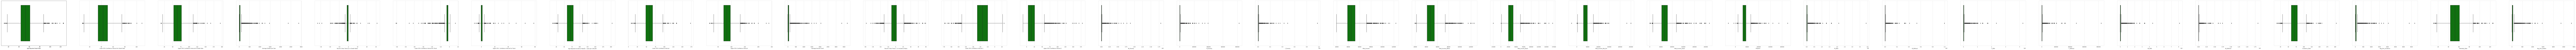

In [43]:
# Plotting a box plot to show the distribution of quantitative data in a way that facilitates comparisons between variables 
number_of_columns=39
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(500,300))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x=df[l[i]],y=None,color='green')

The above box plot shows the distribution of quantitative data in a way that facilitates comparisons between the variables. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution. A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.


Key Inferance:
* In our dataset all the feature columns shows outliers.

In [ ]:
#Using Kernel density estimate (kde) for plotting the shape of distributions to check the linearity of variables and look for skewness of features
plt.figure(figsize=(500,300))
l=np.array(columns1)
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Inferances:
* The “Upper 95% Confidence interval”, "Mortality Rates" and "Recent 5-Year Trend (^) in Incidence Rates" columns appear to be normally distributed.
* All other variables are either positively or negatively skewed.

Text(0, 0.5, 'Avg_Ann_Deaths')

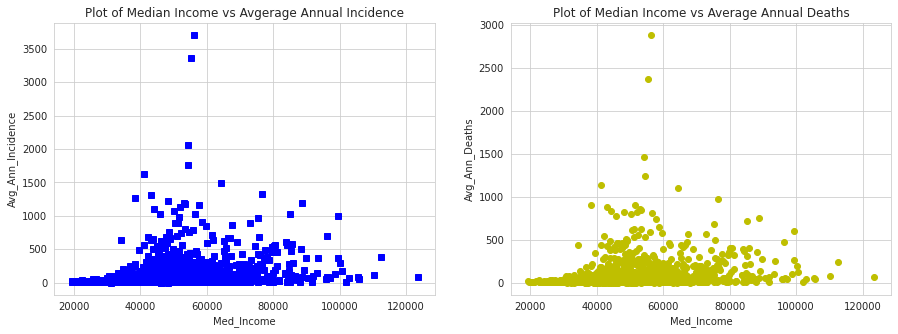

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(df['Med_Income'],df['Avg_Ann_Incidence'],'sb')
plt.title("Plot of Median Income vs Avgerage Annual Incidence")
plt.xlabel('Med_Income')
plt.ylabel('Avg_Ann_Incidence')

plt.subplot(1,2,2)
plt.plot(df['Med_Income'],df['Avg_Ann_Deaths'],'oy')
plt.title("Plot of Median Income vs Average Annual Deaths")
plt.xlabel('Med_Income')
plt.ylabel('Avg_Ann_Deaths')

Inferance:
* Lower the Overall Median Income, higher is the number of average annual deaths. This shows that **"cancer incidence" and "mortality" are correlated with "income levels"**.

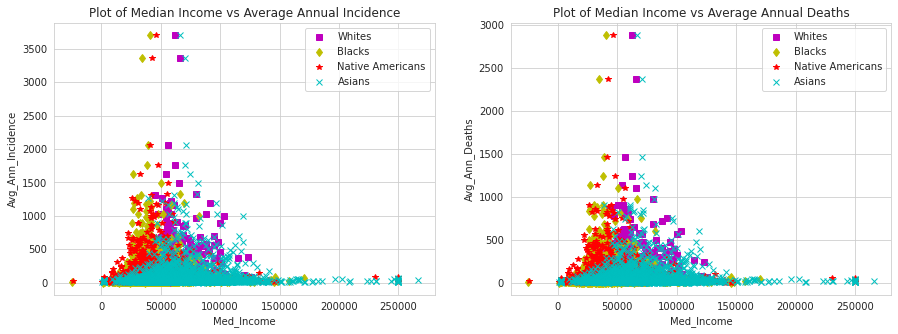

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(df['Med_Income_White'],df['Avg_Ann_Incidence'],'sm')
plt.plot(df['Med_Income_Black'],df['Avg_Ann_Incidence'],'dy')
plt.plot(df['Med_Income_Nat_Am'],df['Avg_Ann_Incidence'],'*r')
plt.plot(df['Med_Income_Asian'],df['Avg_Ann_Incidence'],'xc')
plt.title("Plot of Median Income vs Average Annual Incidence")
plt.xlabel('Med_Income')
plt.ylabel('Avg_Ann_Incidence')
plt.legend(['Whites', 'Blacks','Native Americans','Asians']);

plt.subplot(1,2,2)
plt.plot(df['Med_Income_White'],df['Avg_Ann_Deaths'],'sm')
plt.plot(df['Med_Income_Black'],df['Avg_Ann_Deaths'],'dy')
plt.plot(df['Med_Income_Nat_Am'],df['Avg_Ann_Deaths'],'*r')
plt.plot(df['Med_Income_Asian'],df['Avg_Ann_Deaths'],'xc')
plt.title("Plot of Median Income vs Average Annual Deaths")
plt.xlabel('Med_Income')
plt.ylabel('Avg_Ann_Deaths')
plt.legend(['Whites', 'Blacks','Native Americans','Asians']);

Inferance:
* We see the average incidence and mortality also depends on the kind of ethnic group.
*  Taking any particular value of income, we can infer that the average incidence and mortality **increase** with the type of ethnic group in the order: **Native American, Blacks, Asian, Whites**.

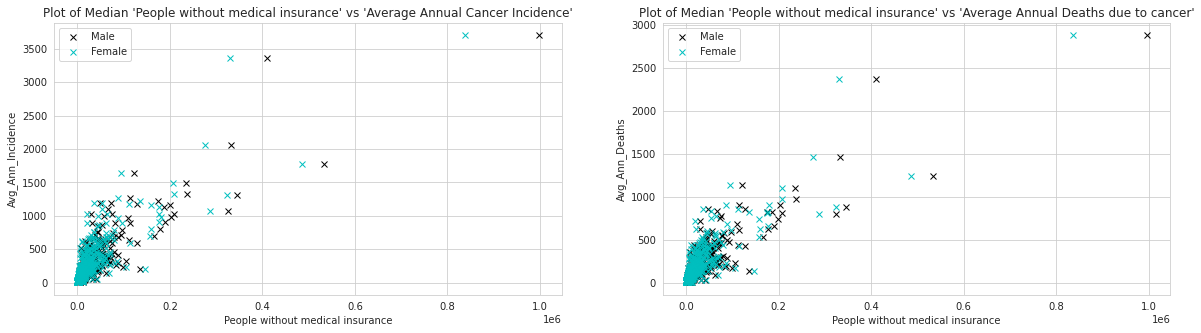

In [49]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(df['M_Without'],df['Avg_Ann_Incidence'],'xk')
plt.plot(df['F_Without'],df['Avg_Ann_Incidence'],'xc')
plt.title("Plot of Median 'People without medical insurance' vs 'Average Annual Cancer Incidence'")
plt.xlabel('People without medical insurance')
plt.ylabel('Avg_Ann_Incidence')
plt.legend(['Male','Female']);

plt.subplot(1,2,2)
plt.plot(df['M_Without'],df['Avg_Ann_Deaths'],'xk')
plt.plot(df['F_Without'],df['Avg_Ann_Deaths'],'xc')
plt.title("Plot of Median 'People without medical insurance' vs 'Average Annual Deaths due to cancer'")
plt.xlabel('People without medical insurance')
plt.ylabel('Avg_Ann_Deaths')
plt.legend(['Male','Female']);

Inferance:
* We see the average incidence and mortality also depends on the gender.
*  Taking any particular value of "number of people of the considered gender without medical insurance", we can infer that the **average incidence and mortality of male is greater than that of female**.

#####**Removing the correlated variables:**

In [50]:
#Finding correlations in the data using the pandas “.corr()” function
corr_matrix = df.corr()
corr_matrix

,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths,Upper 95% Confidence Interval for Trend
Age-Adjusted Death Rate,1.000000,0.921726,0.915545,-0.128972,0.280589,0.216251,0.172619,0.857970,0.774147,0.817254,-0.143565,0.005387,-0.065515,0.041429,-0.147215,-0.147927,-0.146557,-0.445147,-0.430299,-0.267746,-0.154859,0.199924,-0.109340,-0.190096,-0.152079,-0.187369,-0.151540,-0.188701,-0.151910,0.858988,-0.142879,1.000000,-0.128972,0.167922
Lower 95% Confidence Interval for Death Rate,0.921726,1.000000,0.689407,0.051318,0.210471,0.226129,0.052769,0.801420,0.864274,0.616787,0.034357,-0.014688,0.135182,-0.164420,-0.018594,-0.020533,-0.016981,-0.317810,-0.301866,-0.210290,-0.108664,0.150458,-0.099035,-0.039867,-0.038895,-0.037100,-0.039353,-0.038431,-0.039128,0.809519,0.036148,0.921726,0.051318,0.050797
Upper 95% Confidence Interval for Death Rate,0.915545,0.689407,1.000000,-0.275991,0.303001,0.169470,0.262636,0.775458,0.554538,0.891454,-0.285786,0.024657,-0.257766,0.245061,-0.243517,-0.242993,-0.243840,-0.498569,-0.487847,-0.284118,-0.180546,0.219321,-0.101637,-0.299994,-0.233298,-0.297619,-0.232055,-0.298797,-0.232847,0.768069,-0.286365,0.915545,-0.275991,0.255551
Average Deaths per Year,-0.128972,0.051318,-0.275991,1.000000,-0.148537,-0.029171,-0.200920,-0.099987,0.072681,-0.250455,0.994917,-0.044828,0.271460,-0.262390,0.911851,0.909499,0.913381,0.243006,0.291052,0.083560,0.022086,0.001874,0.055868,0.953592,0.871963,0.957421,0.856536,0.955712,0.865290,-0.096587,0.997089,-0.128972,1.000000,-0.199850
Recent 5-Year Trend (2) in Death Rates,0.280589,0.210471,0.303001,-0.148537,1.000000,0.824634,0.549725,0.250417,0.180983,0.281834,-0.148768,0.097630,0.003216,0.086815,-0.130960,-0.131074,-0.130806,-0.194996,-0.208373,-0.232415,-0.118176,0.085701,-0.128716,-0.159081,-0.133607,-0.157883,-0.134109,-0.158478,-0.133910,0.247633,-0.150302,0.280589,-0.148537,0.548282
Lower 95% Confidence Interval for Trend,0.216251,0.226129,0.169470,-0.029171,0.824634,1.000000,-0.010066,0.184256,0.191161,0.148188,-0.030521,0.080844,0.107072,-0.026740,-0.041030,-0.041919,-0.040275,-0.079491,-0.086717,-0.162654,-0.069179,0.006617,-0.059223,-0.050896,-0.048269,-0.050092,-0.048692,-0.050484,-0.048490,0.183856,-0.031274,0.216251,-0.029171,-0.010074
Upper 95% Confidence Interval for Trend,0.172619,0.052769,0.262636,-0.200920,0.549725,-0.010066,1.000000,0.167469,0.052072,0.258592,-0.199597,0.046856,-0.124597,0.160229,-0.159165,-0.158263,-0.159839,-0.209929,-0.225987,-0.158689,-0.098018,0.139696,-0.141985,-0.191280,-0.155025,-0.190393,-0.155442,-0.190843,-0.155300,0.164061,-0.201101,0.172619,-0.200920,0.999207
"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",0.857970,0.801420,0.775458,-0.099987,0.250417,0.184256,0.167469,1.000000,0.930242,0.923921,-0.097751,0.051235,0.019307,-0.000891,-0.132712,-0.133903,-0.131665,-0.368612,-0.371499,-0.229360,-0.136455,0.252796,-0.090873,-0.164153,-0.142154,-0.161197,-0.143213,-0.162635,-0.142719,0.997914,-0.098813,0.857970,-0.099987,0.163684
Lower 95% Confidence Interval,0.774147,0.864274,0.554538,0.072681,0.180983,0.191161,0.052072,0.930242,1.000000,0.720904,0.073343,0.030413,0.207063,-0.194246,-0.008595,-0.010965,-0.006629,-0.240356,-0.240966,-0.171087,-0.090032,0.202698,-0.077156,-0.018660,-0.032476,-0.015679,-0.034509,-0.017110,-0.033434,0.934361,0.073

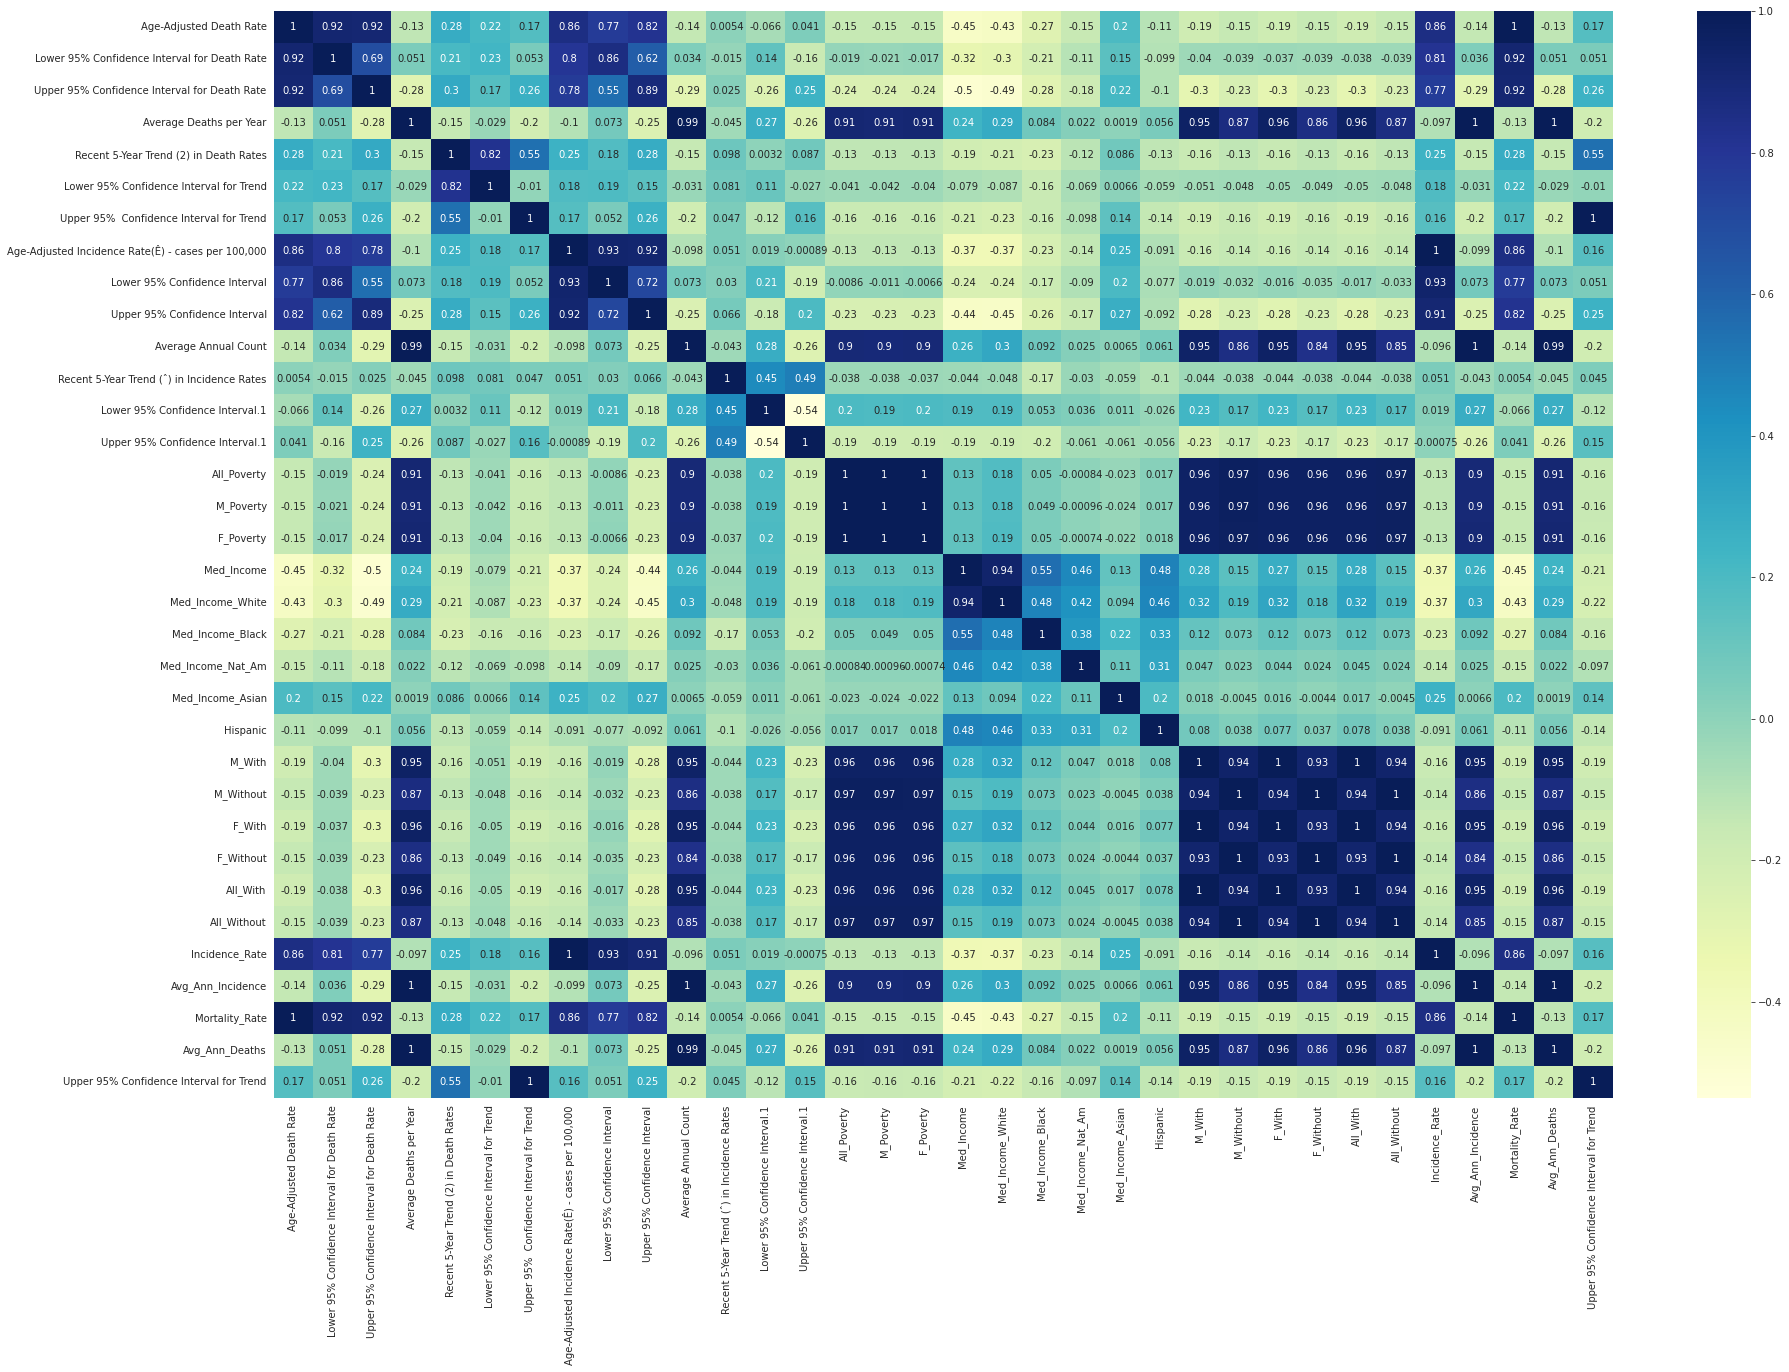

In [51]:
#Visualizing the correlation matrix using a heatmap in seaborn
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, cmap='YlGnBu',annot=True)

In [52]:
for i in columns1:
 print(i,"is in high correlation with: ", end="" )
 for j in columns1:
   if corr_matrix[i][j]>=0.9:
     if i!=j:
      print(j,",",end="")
 print("\n")

Age-Adjusted Death Rate is in high correlation with: Lower 95% Confidence Interval for Death Rate ,Upper 95% Confidence Interval for Death Rate ,Mortality_Rate ,

Lower 95% Confidence Interval for Death Rate is in high correlation with: Age-Adjusted Death Rate ,Mortality_Rate ,

Upper 95% Confidence Interval for Death Rate is in high correlation with: Age-Adjusted Death Rate ,Mortality_Rate ,

Average Deaths per Year is in high correlation with: Average Annual Count ,All_Poverty ,M_Poverty ,F_Poverty ,M_With ,F_With ,All_With ,Avg_Ann_Incidence ,Avg_Ann_Deaths ,

Recent 5-Year Trend (2) in Death Rates is in high correlation with: 

Lower 95% Confidence Interval for Trend is in high correlation with: 

Upper 95%  Confidence Interval for Trend is in high correlation with: 

Age-Adjusted Incidence Rate(Ê) - cases per 100,000 is in high correlation with: Lower 95% Confidence Interval ,Upper 95% Confidence Interval ,Incidence_Rate ,

Lower 95% Confidence Interval is in high correlation with

The above will be used to remove correlated variables during the feature selection decision for the linear model.

##**Scaling the Numerical Values:**

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaler.fit(df[columns1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
df[columns1]=scaler.transform(df[columns1])

#Building the Predictive Model

In [56]:
# Importing the required libraries
import torch.nn as nn
import torch.nn.functional as F
import sklearn
from sklearn.model_selection import train_test_split

In [57]:
df.columns

Index(['AreaName', 'Met Objective of 45.5? (1)', 'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend (2)',
       'Recent 5-Year Trend (2) in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95%  Confidence Interval for Trend',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income',
       'Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am',
       'Med_Income_Asian', 'Hispanic', 'M_With', 'M_Without', 'F_With',
       'F_Without', 'All_With', 'All_Without', 'Incidence_Rate',
       'Avg_Ann_Incidence', 'rec

In [58]:
input_cols=['M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic','Met Objective of 45.5? (1)' ]

output_cols=['Avg_Ann_Incidence', 'Avg_Ann_Deaths']

##**Making the Training, Validation and Test Sets**

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)

In [130]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (2067, 39)
val_df.shape : (689, 39)


In [131]:
train_inputs = train_df[input_cols]
train_targets = train_df[output_cols]

val_inputs = val_df[input_cols]
val_targets = val_df[output_cols]

##**VERSION 1 (Using Linear Regression)**

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(train_inputs, train_targets)

#making predictions on the val data

val_preds= model.predict(val_inputs)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(val_preds, val_targets))
rmse

0.46011504339290904

##**VERSION 2a (Using different ML Algorithms)**

###**KNeighborsRegressor:**

In [133]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

model.fit(train_inputs, train_targets)

#making predictions on the val data

val_preds= model.predict(val_inputs)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(val_preds, val_targets))
rmse

0.5561160991785921

###**DecisionTreeRegressor:**

In [134]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(train_inputs, train_targets)

#making predictions on the val data

val_preds= model.predict(val_inputs)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(val_preds, val_targets))
rmse

0.518351127101555

###**RandomForestRegressor:**

In [135]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(train_inputs, train_targets)

#making predictions on the val data

val_preds= model.predict(val_inputs)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(val_preds, val_targets))
rmse

0.49988959397459554

##**VERSION 2b (Using Deep Learning)**

In [137]:
import torch
import tensorflow as tf
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

In [140]:
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model

def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		X_train, X_test = np.array(X.iloc[train_ix]), np.array(X.iloc[test_ix])
		y_train, y_test = np.array(y.iloc[train_ix]), np.array(y.iloc[test_ix])
		X_train = X_train.astype('float64')
		y_train = y_train.astype('float64')
		X_test = X_test.astype('float64')
		y_test = y_test.astype('float64')
		X_train = torch.tensor(torch.from_numpy(X_train))
		y_train = torch.tensor(torch.from_numpy(y_train))
		X_test = torch.tensor(torch.from_numpy(X_test))
		y_test = torch.tensor(torch.from_numpy(y_test))
		X_train =   tf.cast(X_train.type(torch.FloatTensor),dtype=tf.float32)
		y_train =   tf.cast(y_train.type(torch.FloatTensor),dtype=tf.float32)
		X_test =   tf.cast(X_test.type(torch.FloatTensor),dtype=tf.float32)
		y_test =   tf.cast(y_test.type(torch.FloatTensor),dtype=tf.float32)

		# define model
		model = get_model(n_inputs=9, n_outputs=2)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# evaluate model on test set
		mae = model.evaluate(X_test, y_test, verbose=0)
		# store result
		print('>%.3f' % mae)
		results.append(mae)
	return results

In [141]:
results = evaluate_model(train_inputs, train_targets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTen

>0.103
>0.083
>0.171
>0.090
>0.113
>0.103
>0.086
>0.117
>0.105
>0.115
>0.113
>0.075
>0.089
>0.099
>0.118
>0.141
>0.083
>0.143
>0.143
>0.093
>0.123
>0.115
>0.081
>0.120
>0.102
>0.098
>0.138
>0.112
>0.090
>0.133


In [142]:
preds = model.predict(val_inputs)
preds

array([[-3.62182947e-01, -3.72809581e-01],
       [-1.38182974e-01, -1.41720939e-01],
       [-7.71800451e-03,  1.09270382e-05],
       ...,
       [ 9.25060667e-01,  9.18427376e-01],
       [-1.52950886e-01, -1.40055503e-01],
       [ 2.35733327e-01,  2.12862011e-01]])

In [143]:
outputs=val_targets
outputs=np.array(outputs)
outputs

array([[-0.3988598 , -0.40361649],
       [-0.13410203, -0.07666036],
       [ 0.06305801,  0.11795639],
       ...,
       [ 1.89946299,  1.75273706],
       [-0.22423234, -0.15450705],
       [ 0.53900885,  0.69402196]])

In [147]:
#making predictions on the validation data

val_preds= model.predict(val_inputs)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(preds, outputs))
rmse

0.46513870442978894

In [144]:
Avg_Ann_Incidence_outputs=[]
Avg_Ann_Deaths_outputs=[]
Avg_Ann_Incidence_preds=[]
Avg_Ann_Deaths_preds=[]

for i in range(0,len(outputs)):
  Avg_Ann_Incidence_outputs.append(outputs[i][0])
  Avg_Ann_Deaths_outputs.append(outputs[i][1])

for i in range(0,len(preds)):
  Avg_Ann_Incidence_preds.append(preds[i][0])
  Avg_Ann_Deaths_preds.append(preds[i][1])

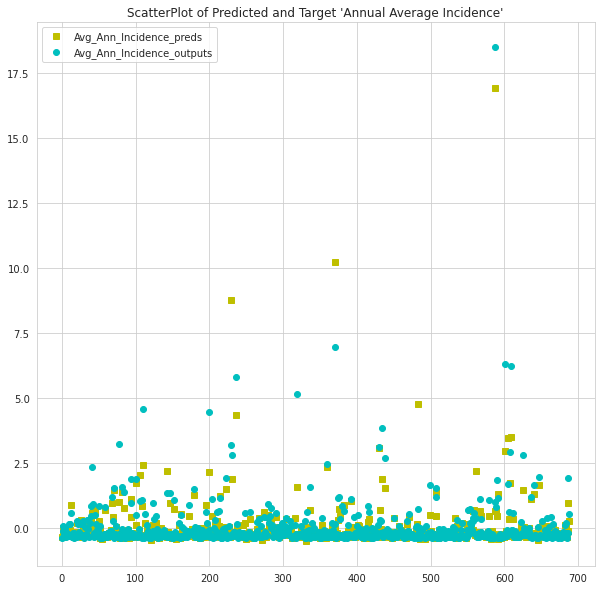

In [145]:
plt.figure(figsize=(10,10))
plt.plot(Avg_Ann_Incidence_preds,'sy')
plt.plot(Avg_Ann_Incidence_outputs, 'oc')
plt.title("ScatterPlot of Predicted and Target 'Annual Average Incidence'")
plt.legend(['Avg_Ann_Incidence_preds','Avg_Ann_Incidence_outputs']);

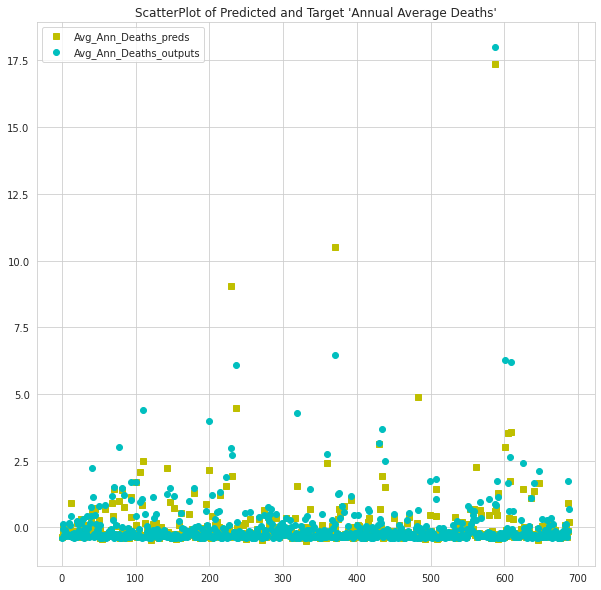

In [146]:
plt.figure(figsize=(10,10))
plt.plot(Avg_Ann_Deaths_preds,'sy')
plt.plot(Avg_Ann_Deaths_outputs, 'oc')
plt.title("ScatterPlot of Predicted and Target 'Annual Average Deaths'")
plt.legend(['Avg_Ann_Deaths_preds','Avg_Ann_Deaths_outputs']);